# 1. Import necessary libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

# 2- Data Loading and Description

## File Descriptions and Data Field Information

### `train.csv`
The training data, comprising time series of features: `store_nbr`, `family`, and `onpromotion`, as well as the target `sales`.

- `store_nbr`: Identifies the store at which the products are sold.
- `family`: Identifies the type of product sold.
- `sales`: Gives the total sales for a product family at a particular store on a given date. Fractional values are possible since products can be sold in fractional units (e.g., 1.5 kg of cheese).
- `onpromotion`: Gives the total number of items in a product family that were being promoted at a store on a given date.

### `stores.csv`
Store metadata, including the following features:
- `city`: City where the store is located.
- `state`: State where the store is located.
- `type`: Type of store.
- `cluster`: A grouping of similar stores.

### `oil.csv`
Daily oil prices, including values during both the training and test data timeframes.

- **Note**: Ecuador is an oil-dependent country, and its economic health is highly vulnerable to shocks in oil prices. 

### `holidays_events.csv`
Holidays and Events data, with metadata.

In [2]:
df1 = pd.read_csv("../data/holidays_events.csv")
df1.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [3]:
print("About Dataset:")
df1.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [4]:
df2 = pd.read_csv("../data/oil.csv")
df2.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [5]:
print("About Dataset:")
df2.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [6]:
df2.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [7]:
df3 = pd.read_csv("../data/stores.csv")
df3.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [8]:
print("About Dataset:")
df3.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [9]:
df4 = pd.read_csv("../data/transactions.csv")
df4.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [10]:
print("About Dataset:")
df4.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [11]:
df5 = pd.read_csv("../data/train.csv")
df5.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [12]:
print("About Dataset:")
df5.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


# 2- merge the data

rename the data sets

In [13]:
holiday = pd.read_csv("../data/holidays_events.csv")
oil = pd.read_csv("../data/oil.csv")
stores = pd.read_csv("../data/stores.csv")
transactions = pd.read_csv("../data/transactions.csv")
train = pd.read_csv("../data/train.csv")

In [14]:
holiday['date'] = pd.to_datetime(holiday['date'])
oil['date'] = pd.to_datetime(oil['date'])
transactions['date'] = pd.to_datetime(transactions['date'])
train['date'] = pd.to_datetime(train['date'])

In [15]:
# copying of train data and merging other data
df_train = train.merge(holiday, on = 'date', how='left')
df_train = df_train.merge(oil.assign(date= oil['date'] + pd.DateOffset(days=7)), on='date', how='left', suffixes=('', '_lag_7'))
df_train = df_train.merge(stores, on = 'store_nbr', how='left')
df_train = df_train.merge(transactions, on = ['date', 'store_nbr'], how='left')
df_train = df_train.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})

df_train['date'] = pd.to_datetime(df_train['date'])
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['week'] = df_train['date'].dt.isocalendar().week
df_train['quarter'] = df_train['date'].dt.quarter
df_train['day_of_week'] = df_train['date'].dt.day_name()
df_train[:2]

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   holiday_type  object        
 7   locale        object        
 8   locale_name   object        
 9   description   object        
 10  transferred   object        
 11  dcoilwtico    float64       
 12  city          object        
 13  state         object        
 14  store_type    object        
 15  cluster       int64         
 16  transactions  float64       
 17  year          int32         
 18  month         int32         
 19  week          UInt32        
 20  quarter       int32         
 21  day_of_week   object        
dtypes: UInt32(1), datetime64[ns](1), float64(3), int32(3), int64(4), o

In [17]:
df_train.isnull().sum()


id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dcoilwtico       964062
city                  0
state                 0
store_type            0
cluster               0
transactions     249117
year                  0
month                 0
week                  0
quarter               0
day_of_week           0
dtype: int64

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   holiday_type  object        
 7   locale        object        
 8   locale_name   object        
 9   description   object        
 10  transferred   object        
 11  dcoilwtico    float64       
 12  city          object        
 13  state         object        
 14  store_type    object        
 15  cluster       int64         
 16  transactions  float64       
 17  year          int32         
 18  month         int32         
 19  week          UInt32        
 20  quarter       int32         
 21  day_of_week   object        
dtypes: UInt32(1), datetime64[ns](1), float64(3), int32(3), int64(4), o

## Understanding the missing values

In [19]:
df_train.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dcoilwtico       964062
city                  0
state                 0
store_type            0
cluster               0
transactions     249117
year                  0
month                 0
week                  0
quarter               0
day_of_week           0
dtype: int64

In [20]:
df_train['holiday_type'].value_counts()

holiday_type
Holiday       304722
Event          99792
Additional     67716
Transfer       16038
Work Day        8910
Bridge          5346
Name: count, dtype: int64

Should be imputed with a **relative mode** or by **imputing using machine learning techniques**.

In [21]:
df_train['locale'].value_counts()

locale
National    261954
Local       208494
Regional     32076
Name: count, dtype: int64

The missing values in the `holiday_type` column should be either removed or imputed, similar to how we handle missing data in other columns.

In [22]:
df_train['transferred'].isnull().sum()/len(df_train) * 100

np.float64(83.54725787631271)

In [23]:
df_train[['transferred', 'holiday_type']].value_counts()

transferred  holiday_type
False        Holiday         288684
             Event            99792
             Additional       67716
True         Holiday          16038
False        Transfer         16038
             Work Day          8910
             Bridge            5346
Name: count, dtype: int64

## Note on Holiday Data Semantics and Missing Values

The `transferred` and `type` columns in the holidays dataset require careful interpretation:

- A `transferred = True` holiday indicates the holiday was **moved to another date** by the government and should be treated like a normal day.
- The actual celebration happens on a different row with `type = "Transfer"`.
- `Bridge` days are **extra off-days** to extend a holiday (e.g., long weekends).
- `Work Day` types represent **make-up days**, often scheduled on weekends.

However, it’s important to note that the `transferred` column contains **around 80% missing values**. Rather than dropping this column, we must deal with the missing values effectively. This could be done through **imputation** or other strategies that ensure the column retains its relevance in the analysis.

Failing to interpret these correctly may introduce **errors in holiday-based features or time-series trends**, as they influence shopping behavior significantly.


In [24]:
df_train['transactions'].isnull().sum()

np.int64(249117)

This could be imputed with the **mean** or **median** (depending on the distribution and the presence of outliers).

# 3- EDA

In [25]:
df_train.describe()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,cluster,transactions,year,month,week,quarter
count,3.054348e+06,3054348,3.054348e+06,3.054348e+06,3.054348e+06,2.090286e+06,3.054348e+06,2.805231e+06,3.054348e+06,3.054348e+06,3054348.0,3.054348e+06
mean,1.504277e+06,2015-04-26 12:11:45.717619200,2.750000e+01,3.590209e+02,2.617480e+00,6.807354e+01,8.481481e+00,1.697071e+03,2.014842e+03,6.222870e+00,25.308635,2.413652e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,1.000000e+00,5.000000e+00,2.013000e+03,1.000000e+00,1.0,1.000000e+00
25%,7.546768e+05,2014-03-01 00:00:00,1.400000e+01,0.000000e+00,0.000000e+00,4.638000e+01,4.000000e+00,1.046000e+03,2.014000e+03,3.000000e+00,13.0,1.000000e+00
50%,1.507572e+06,2015-04-28 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00,5.346000e+01,8.500000e+00,1.395000e+03,2.015000e+03,6.000000e+00,25.0,2.000000e+00
75%,2.255120e+06,2016-06-22 00:00:00,4.100000e+01,1.960110e+02,0.000000e+00,9.582000e+01,1.300000e+01,2.081000e+03,2.016000e+03,9.000000e+00,38.0,3.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,1.700000e+01,8.359000e+03,2.017000e+03,1.200000e+01,53.0,4.000000e+00
std,8.662610e+05,NaN,1.558579e+01,1.107286e+03,1.225494e+01,2.569465e+01,4.649735e+00,9.668317e+02,1.345607e+00,3.374251e+00,14.750509,1.095690e+00


In [26]:
df_train.shape

(3054348, 22)

In [27]:
df_train.dtypes

id                       int64
date            datetime64[ns]
store_nbr                int64
family                  object
sales                  float64
onpromotion              int64
holiday_type            object
locale                  object
locale_name             object
description             object
transferred             object
dcoilwtico             float64
city                    object
state                   object
store_type              object
cluster                  int64
transactions           float64
year                     int32
month                    int32
week                    UInt32
quarter                  int32
day_of_week             object
dtype: object

get_dummies() function to perform one-hot encoding.Creates a binary (0 or 1) column for each category

### 📌 Note:
- **Wages in the public sector** are paid **every two weeks** on the **15th** and on the **last day of the month**.  
  This may significantly **affect supermarket sales** due to increased purchasing power on those days.
- A **magnitude 7.8 earthquake** struck **Ecuador on April 16, 2016**.  
  Following the disaster, people **donated water and other essential goods**, which **greatly impacted supermarket sales** for several weeks after the event.

In [28]:
holiday_sales=df_train.groupby('holiday_type')['sales'].mean()
holiday_sales 

holiday_type
Additional    487.628925
Bridge        446.750854
Event         425.660065
Holiday       358.433812
Transfer      467.753110
Work Day      372.157524
Name: sales, dtype: float64

Additional holidays seem to generate the highest average sales (~487.63). 

Transfers also seem to lead to higher-than-average sales (~467.75).

Regular holidays (Holiday and Work Day) generate relatively lower sales on average compared to other holiday types.

In [29]:
df_train['holiday_type'].unique()

array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer',
       'Bridge'], dtype=object)

In [30]:
df_train['store_type'].unique()

array(['D', 'C', 'B', 'E', 'A'], dtype=object)

In [31]:
df_train['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [32]:
df_train['city'].unique()


array(['Quito', 'Cayambe', 'Latacunga', 'Riobamba', 'Ibarra',
       'Santo Domingo', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil',
       'Salinas', 'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad',
       'Cuenca', 'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

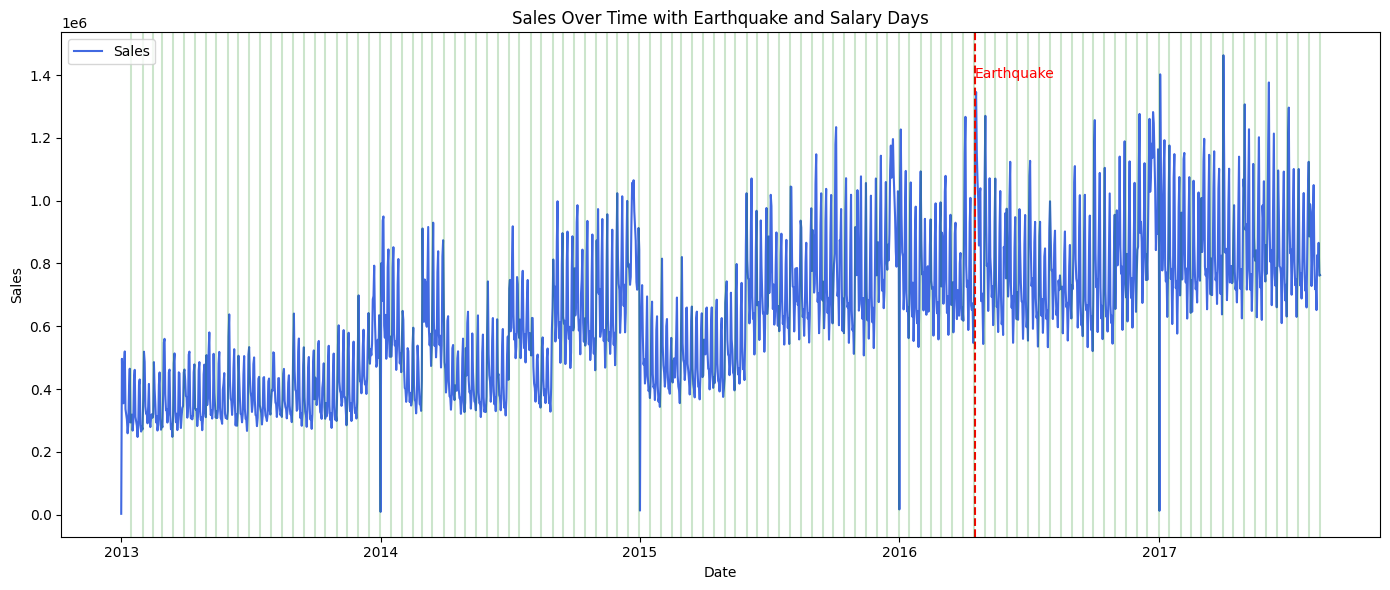

In [33]:
sales_by_date = train.groupby('date')['sales'].sum()
plt.figure(figsize=(14,6))
plt.plot(sales_by_date, label='Sales', color='royalblue')

plt.axvline(pd.to_datetime('2016-04-16'), color='red', linestyle='--', linewidth=1.5)
plt.text(pd.to_datetime('2016-04-16'), max(sales_by_date)*0.95, 'Earthquake', color='red')

salary_days = sales_by_date.index[(sales_by_date.index.day == 15) | 
                                   (sales_by_date.index.is_month_end)]

for date in salary_days:
    plt.axvline(date, color='green', alpha=0.2)

plt.title('Sales Over Time with Earthquake and Salary Days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Average Sales by Holiday Type'}, xlabel='holiday_type'>

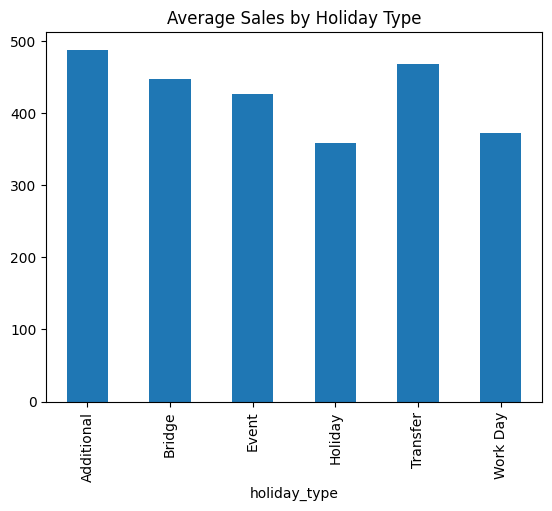

In [34]:
holiday_sales.plot(kind='bar', title='Average Sales by Holiday Type')

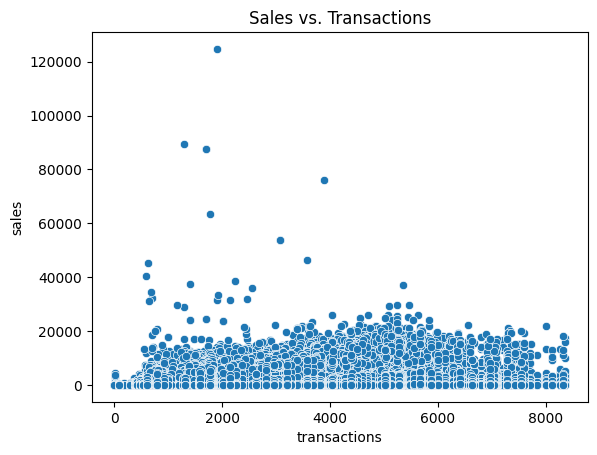

In [35]:
sns.scatterplot(data=df_train, x='transactions', y='sales')
plt.title('Sales vs. Transactions')
plt.show()


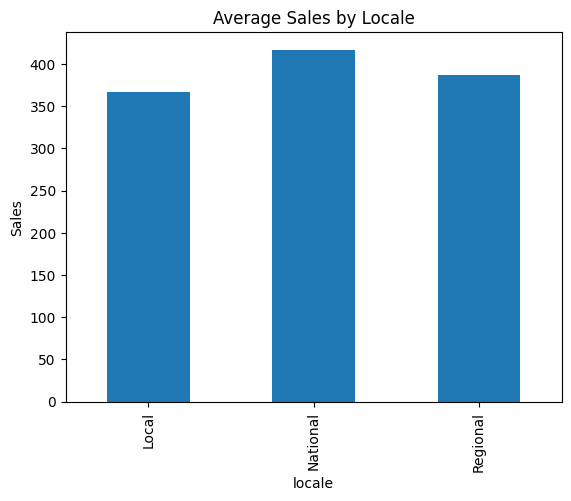

In [36]:
df_train.groupby('locale')['sales'].mean().plot(kind='bar')
plt.title('Average Sales by Locale')
plt.ylabel('Sales')
plt.show()


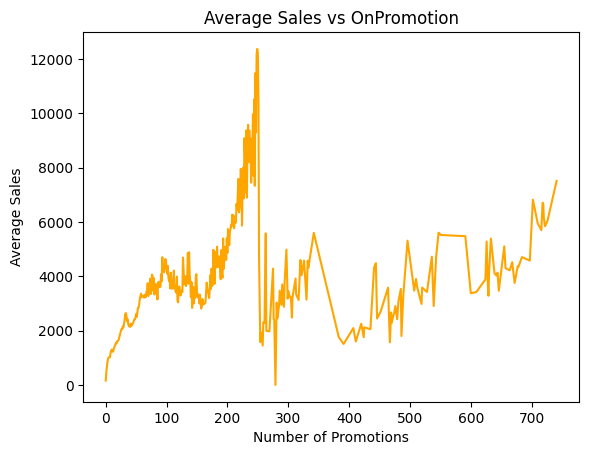

In [37]:
df_train.groupby('onpromotion')['sales'].mean().plot(color='orange')
plt.title('Average Sales vs OnPromotion')
plt.xlabel('Number of Promotions')
plt.ylabel('Average Sales')
plt.show()

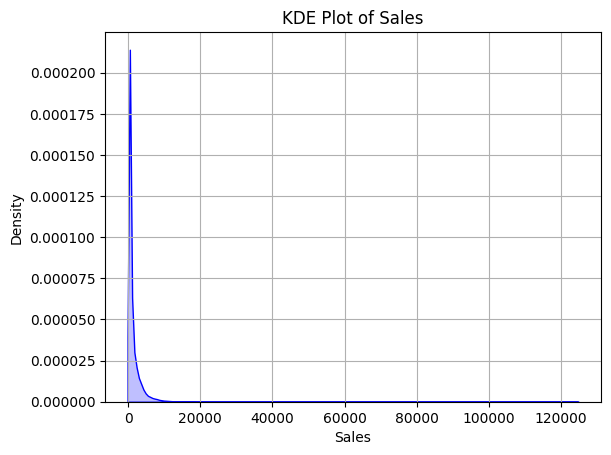

In [38]:
sns.kdeplot(df_train['sales'], fill=True, color='blue')

plt.title('KDE Plot of Sales')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.grid(True)
plt.show()

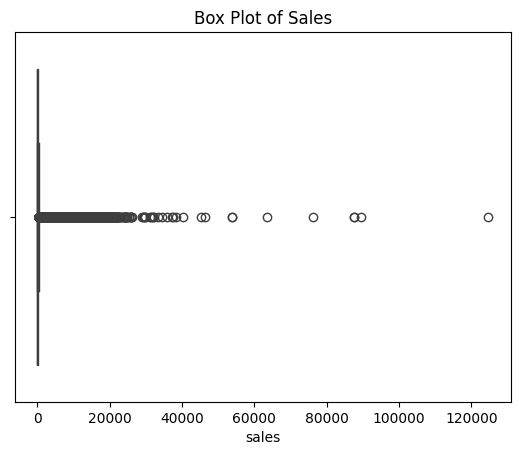

In [39]:
sns.boxplot(data=df_train, x='sales')
plt.title('Box Plot of Sales')
plt.show()


In [40]:
sales = df_train['sales']
print(sales.mean())
print(sales.median())

359.02089225139053
11.0


In [41]:
Q1 = df_train['sales'].quantile(0.25)
Q3 = df_train['sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
outliers = df_train[(df_train['transactions'] < lower_bound) | (df_train['transactions'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")

Lower Bound: -294.0165, Upper Bound: 490.02750000000003
Number of Outliers: 2788335


### Outlier Detection for Target Value

- **Lower Bound**: -294.02
- **Upper Bound**: 490.03
- **Number of Outliers**: 2,788,335

These results indicate that a significant portion of the dataset's target values are outliers. Given that the target value likely represents sales, these outliers could represent extreme sales events, such as sudden spikes or drops in sales that might be driven by special promotions, holidays, or external factors like economic changes or market anomalies.

#### Next Steps:
- Investigate the specific instances where these outliers occur to determine if they represent valid extreme cases or errors.
- Depending on the business context, outliers might need to be handled either by removal, transformation, or a different imputation method to avoid distorting the model.

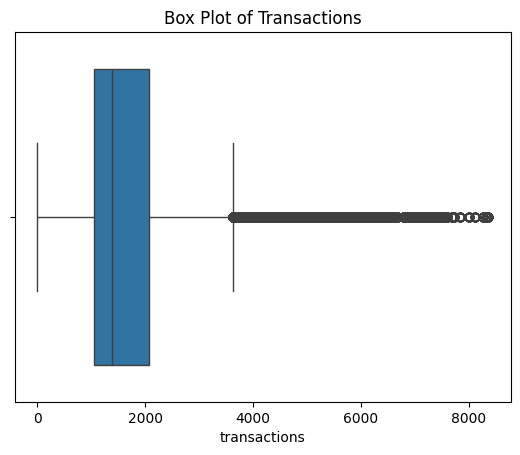

In [42]:
sns.boxplot(data=df_train, x='transactions')
plt.title('Box Plot of Transactions')
plt.show()

In [43]:
transactions_values = df_train['transactions']
print(transactions_values.mean())
print(transactions_values.median())

1697.0714411754327
1395.0


In [44]:
Q1 = df_train['transactions'].quantile(0.25)
Q3 = df_train['transactions'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
outliers = df_train[(df_train['transactions'] < lower_bound) | (df_train['transactions'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")

Lower Bound: -506.5, Upper Bound: 3633.5
Number of Outliers: 154308


### Outlier Detection Results In the `transactions` Column

- **Lower Bound**: -506.5
- **Upper Bound**: 3633.5
- **Number of Outliers**: 154,308

These results indicate that there are 154,308 rows in the dataset where the values exceed the upper bound or are below the lower bound, suggesting they are outliers based on the 1.5 * IQR rule.

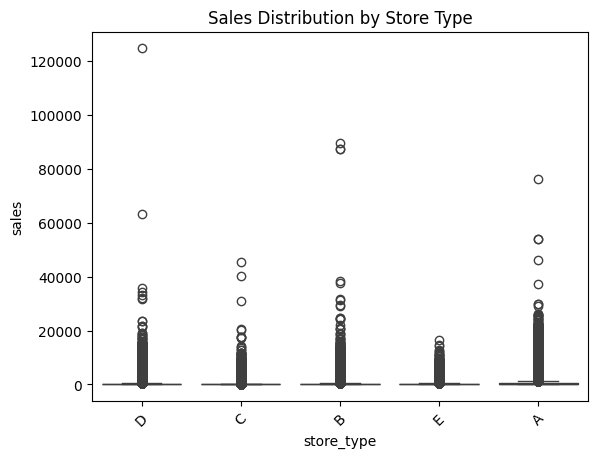

In [45]:
sns.boxplot(data=df_train, x='store_type', y='sales')
plt.title('Sales Distribution by Store Type')
plt.xticks(rotation=45)
plt.show()

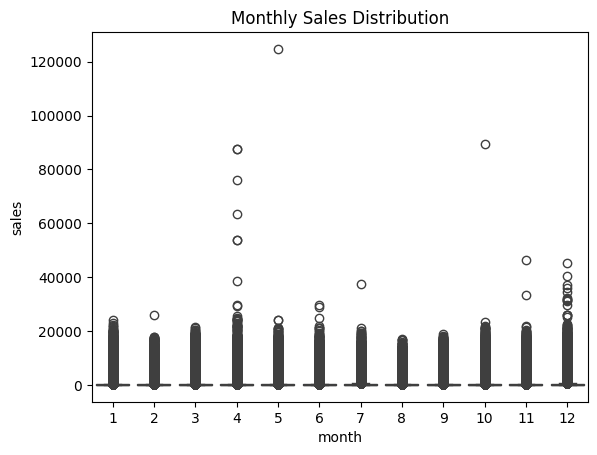

In [46]:
sns.boxplot(data=df_train, x='month', y='sales')
plt.title('Monthly Sales Distribution')
plt.show()


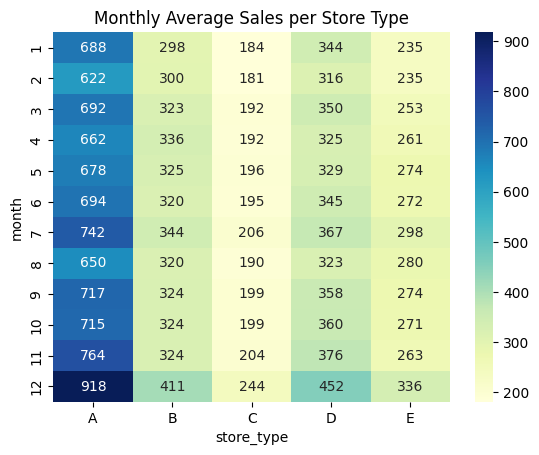

In [47]:
pivot = df_train.pivot_table(index='month', columns='store_type', values='sales', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Monthly Average Sales per Store Type')
plt.show()


## Checking for linearity

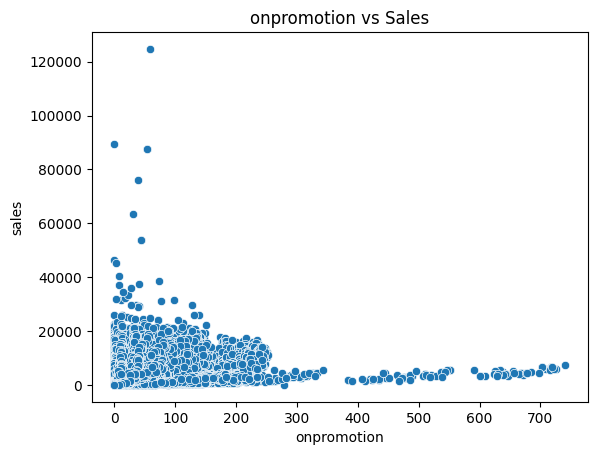

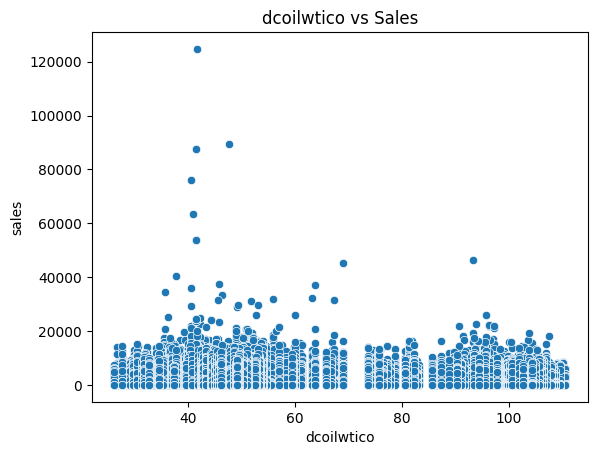

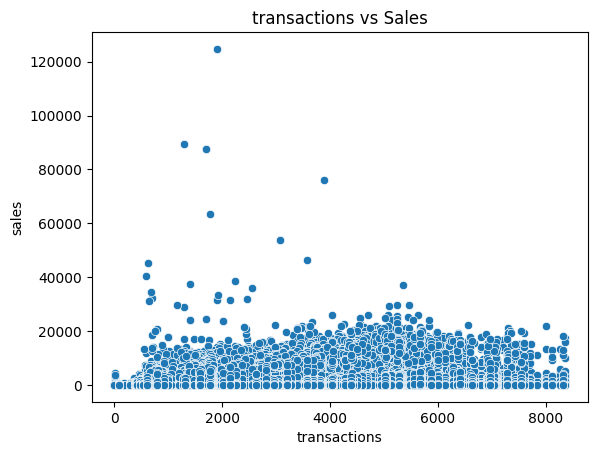

In [48]:
numerical_features = ['onpromotion', 'dcoilwtico', 'transactions']
for feature in numerical_features:
    sns.scatterplot(x=df_train[feature], y=df_train['sales'])
    plt.title(f'{feature} vs Sales')
    plt.show()

In [49]:
# Keep only the most relevant numerical variables
relevant_columns = ['sales', 'onpromotion', 'dcoilwtico', 'transactions']
correlation_matrix = df_train[relevant_columns].corr()

In [50]:
correlation_matrix

,sales,onpromotion,dcoilwtico,transactions
sales,1.000000,0.428241,-0.078726,0.214848
onpromotion,0.428241,1.000000,-0.152765,0.025809
dcoilwtico,-0.078726,-0.152765,1.000000,0.018192
transactions,0.214848,0.025809,0.018192,1.000000


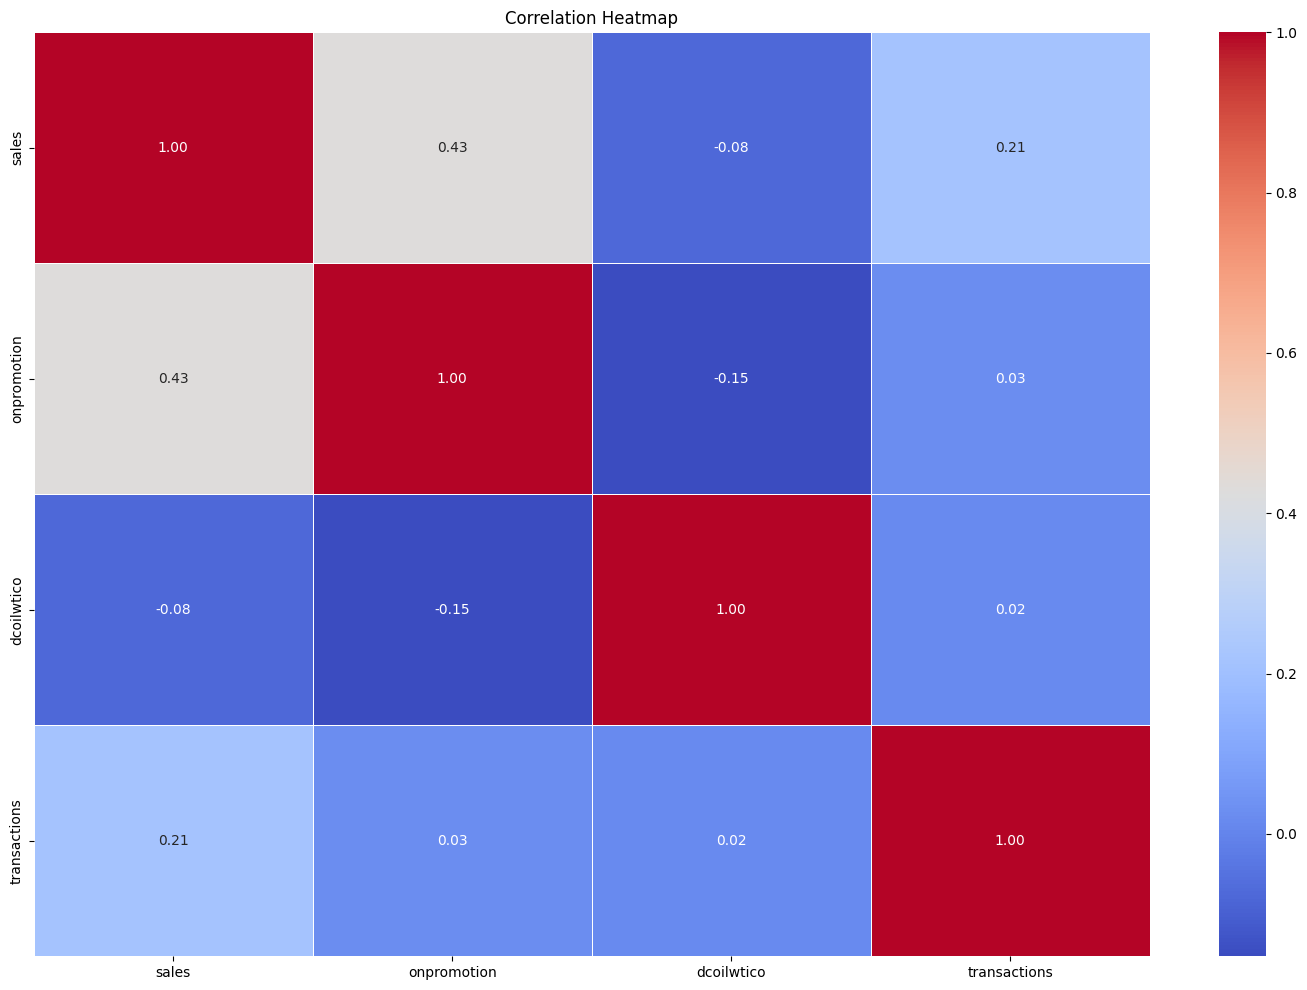

In [51]:
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Correlation Insights

- **Oil Price**: Correlation with sales is -0.08, indicating a very weak negative relationship. This suggests that as oil prices increase, sales tend to decrease slightly — but the effect is minimal. Despite the low linear correlation, oil prices may still contribute to model performance in more complex, non-linear models or during specific economic events.

- **Transactions**: Correlation with sales is 0.21, showing a weak positive relationship. This is expected, as more transactions generally mean more sales. Although not strongly correlated linearly, this feature should be kept, especially since it directly reflects customer activity.

> ✅ Both features will be retained for modeling, and further feature engineering (e.g., lags, rolling statistics) may enhance their usefulness.

## Check for Stationarity (for ARIMA)

In [52]:
from statsmodels.tsa.stattools import kpss

result = kpss(df_train['sales'].dropna())
print(f"KPSS Statistic: {result[0]}")
print(f"p-value: {result[1]}")


KPSS Statistic: 147.99573100271914
p-value: 0.01


C:\Users\DELL\AppData\Local\Temp\ipykernel_14184\3990954170.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df_train['sales'].dropna())


# Check for Seasonality / Trend / Noise

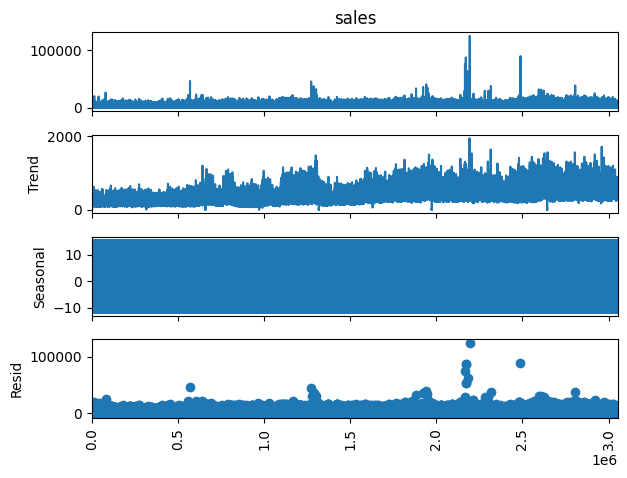

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_train['sales'], model='additive', period=365)
result.plot()
plt.xticks(rotation=90)
plt.show()

# Distinguishing Numerical and Categorical Features

In [54]:
cat_cols = df_train.select_dtypes(include='object').columns
print("Number of Categorical Features = ", len(cat_cols), "\nCategorical Features' Names: ", list(cat_cols))
num_cols = df_train.select_dtypes(include='number').columns
print("Number of Categorical Features = ", len(num_cols), "\nCategorical Features' Names: ", list(num_cols))

Number of Categorical Features =  10 
Categorical Features' Names:  ['family', 'holiday_type', 'locale', 'locale_name', 'description', 'transferred', 'city', 'state', 'store_type', 'day_of_week']
Number of Categorical Features =  11 
Categorical Features' Names:  ['id', 'store_nbr', 'sales', 'onpromotion', 'dcoilwtico', 'cluster', 'transactions', 'year', 'month', 'week', 'quarter']


In [55]:
df_train.to_csv("../data/explored_train.csv", index=False)